In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clothing-fit-dataset-for-size-recommendation/modcloth_final_data.json
/kaggle/input/clothing-fit-dataset-for-size-recommendation/renttherunway_final_data.json


In [2]:
#if dataset is in json format, pd.read_json()
modcloth_data = pd.read_json("/kaggle/input/clothing-fit-dataset-for-size-recommendation/modcloth_final_data.json", lines = True)
renttherunway_data = pd.read_json("/kaggle/input/clothing-fit-dataset-for-size-recommendation/renttherunway_final_data.json", lines = True)

In [3]:
modcloth_data.head(4)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN


In [4]:
modcloth_data.shape

(82790, 18)

In [5]:
modcloth_data.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [6]:
modcloth_data = modcloth_data.drop('item_id', axis=1)

In [7]:
modcloth_data.isnull().sum()

waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [8]:
percentage_of_null = pd.DataFrame({'missing_data': modcloth_data.isnull().sum(), 'percentag_missing': (modcloth_data.isnull().sum()*100.00)/len(modcloth_data)})

In [9]:
percentage_of_null

,missing_data,percentag_missing
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118
user_name,0,0.000000


In [10]:
modcloth_data['hips'].unique()

array([38., 30., nan, 41., 42., 50., 49., 60., 36., 44., 39., 35., 34.,
       32., 48., 52., 40., 46., 37., 45., 55., 51., 33., 53., 54., 47.,
       59., 43., 57., 58., 31., 56.])

In [11]:
modcloth_data.describe()

,waist,size,quality,hips,bra size,user_id,shoe size
count,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


In [12]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82790 entries, 0 to 82789
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   waist           2882 non-null   float64
 1   size            82790 non-null  int64  
 2   quality         82722 non-null  float64
 3   cup size        76535 non-null  object 
 4   hips            56064 non-null  float64
 5   bra size        76772 non-null  float64
 6   category        82790 non-null  object 
 7   bust            11854 non-null  object 
 8   height          81683 non-null  object 
 9   user_name       82790 non-null  object 
 10  length          82755 non-null  object 
 11  fit             82790 non-null  object 
 12  user_id         82790 non-null  int64  
 13  shoe size       27915 non-null  float64
 14  shoe width      18607 non-null  object 
 15  review_summary  76065 non-null  object 
 16  review_text     76065 non-null  object 
dtypes: float64(5), int64(2), object(10)


In [13]:
categorical_columns = ['cup size', 'category', 'bust', 'height', 'length', 'fit', 'shoe width']

In [14]:
numerical_columns = ['waist', 'size', 'quality', 'hips', 'bra size', 'shoe size']

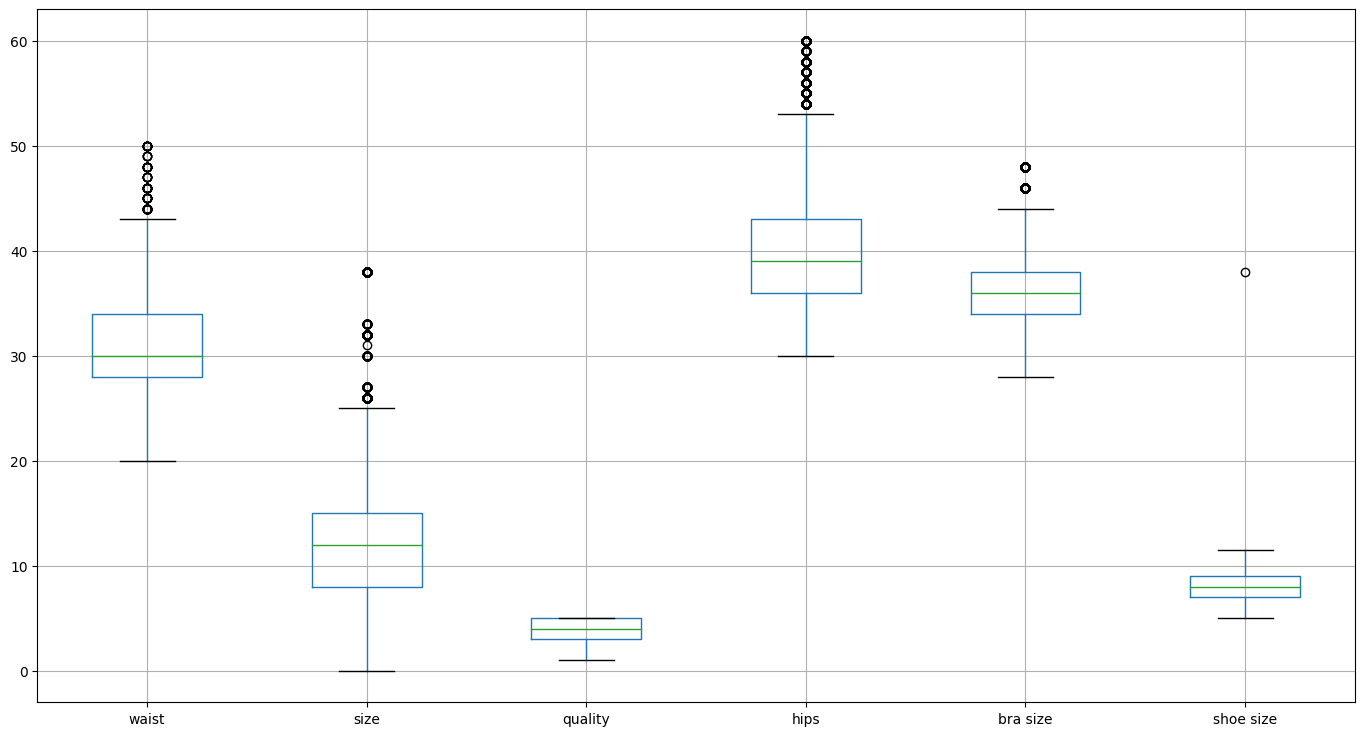

In [15]:
#box plot to see outliers
plt.figure(figsize=(17,9))
modcloth_data[numerical_columns].boxplot()
plt.show()

In [16]:
#Shoe size has only one value out of box plot, so it can be an outlier
modcloth_data[modcloth_data['shoe size']==38]

,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [17]:
percentage_of_null

,missing_data,percentag_missing
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118
user_name,0,0.000000


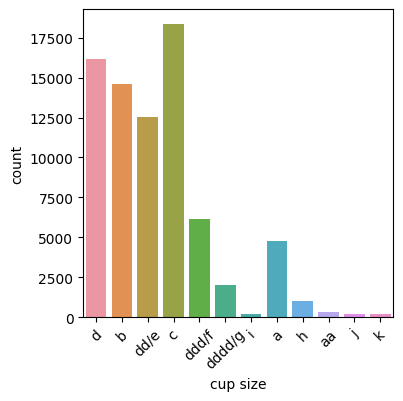

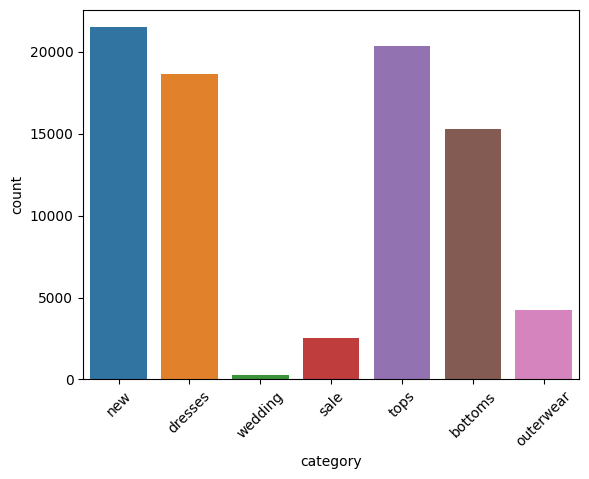

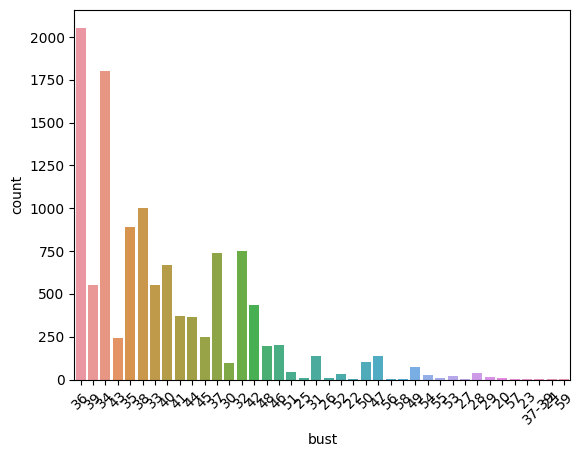

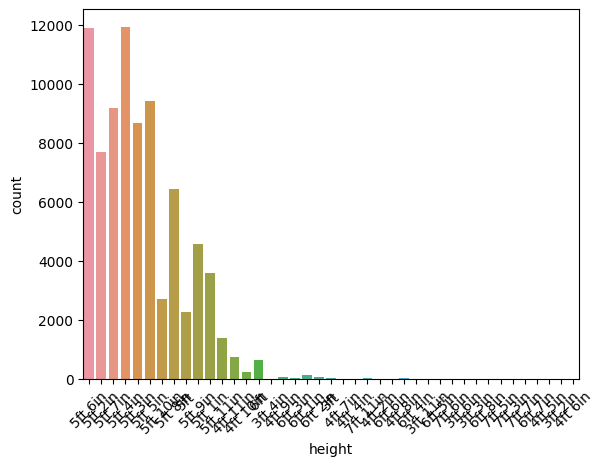

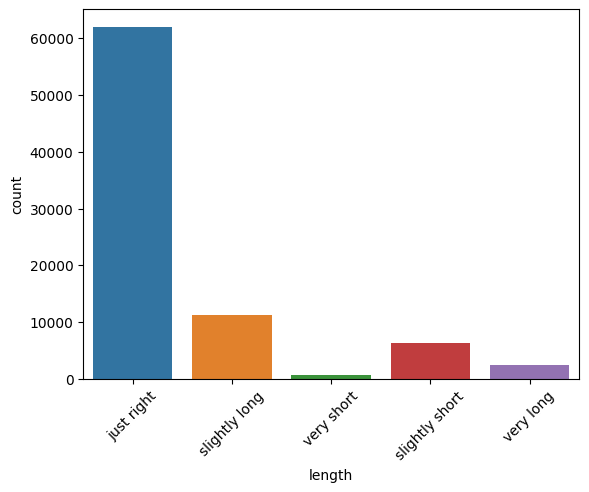

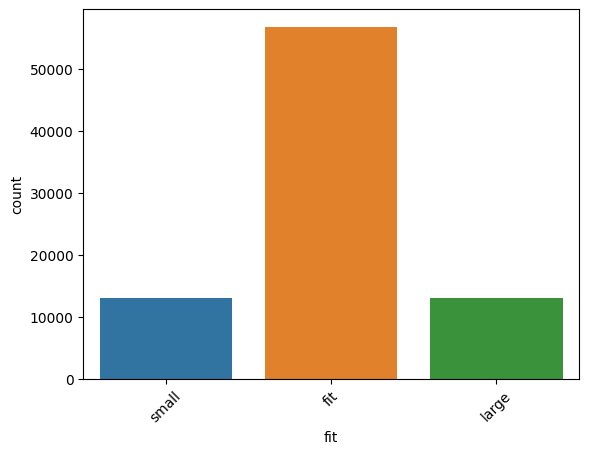

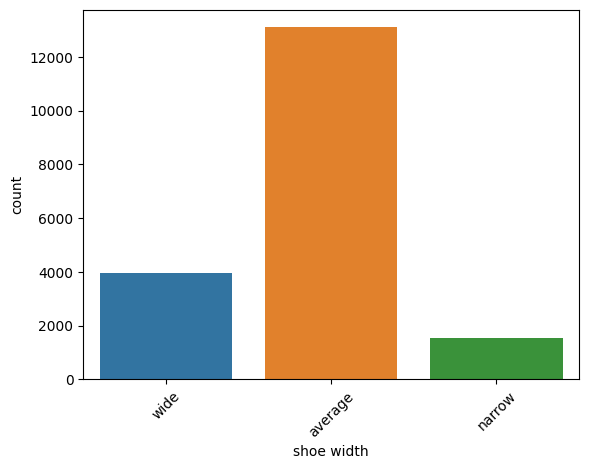

In [18]:
  plt.figure(figsize = (4,4))
for category in categorical_columns:
    ax = plt.subplot(1,1,1)
  
    sns.countplot(data=modcloth_data, x = category)
    ax.set_xlabel(f"{category}")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
modcloth_data['bra size'].unique()

array([34., 36., 32., nan, 38., 42., 40., 44., 46., 30., 48., 28.])

In [20]:
#Bra size should be categorical variable

In [21]:
#Dropping all the columns whose missing value is more than 60%

In [22]:
percentage_of_null

,missing_data,percentag_missing
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118
user_name,0,0.000000


In [23]:
# modcloth_data = modcloth_data.drop(['waist', 'bust', 'shoe width'], axis = 1)

In [24]:
modcloth_data.columns

Index(['waist', 'size', 'quality', 'cup size', 'hips', 'bra size', 'category',
       'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size',
       'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [25]:
modcloth_data['cup size'].unique()

array(['d', 'b', 'dd/e', 'c', 'ddd/f', 'dddd/g', 'i', 'a', nan, 'h', 'aa',
       'j', 'k'], dtype=object)

In [26]:
modcloth_data['bra size'] = modcloth_data['bra size'].fillna('Unknown')
modcloth_data['cup size'] = modcloth_data['cup size'].fillna('Unknown')

In [27]:
modcloth_data['bra size'] = modcloth_data['bra size'].astype('category')
modcloth_data['category'] = modcloth_data['category'].astype('category')
modcloth_data['cup size'] = modcloth_data['cup size'].astype('category')
modcloth_data['fit'] = modcloth_data['fit'].astype('category')

In [28]:
modcloth_data['bra size'].unique()

[34.0, 36.0, 32.0, 'Unknown', 38.0, ..., 44.0, 46.0, 30.0, 48.0, 28.0]
Length: 12
Categories (12, object): [28.0, 30.0, 32.0, 34.0, ..., 44.0, 46.0, 48.0, 'Unknown']

In [29]:
modcloth_data['height']

0        5ft 6in
1        5ft 2in
2        5ft 7in
3            NaN
4        5ft 2in
          ...   
82785    5ft 8in
82786    5ft 5in
82787    5ft 4in
82788    5ft 3in
82789        6ft
Name: height, Length: 82790, dtype: object

In [30]:
modcloth_data[['height_ft', 'height_in']] = modcloth_data['height'].str.split(' ', expand=True)

In [31]:
# def calculate_cm(x):
#     try:
#         return  (x['height_ft'][0]*30.48 + x['height_in'][0]*2.54)
#     except:
#         return x['height_ft'][0]*30.48
# modcloth_data['height'] = modcloth_data[['height_ft', 'height_in']].apply(calculate_cm)



for i in range(len(modcloth_data)):
    if not pd.isna(modcloth_data['height'][i]):
        try:
            modcloth_data['height'][i] = int(modcloth_data['height_ft'][i][0])*30.48 + int(modcloth_data['height_in'][i][0])*2.54
        except:
            modcloth_data['height'][i] = int(modcloth_data['height_ft'][i][0])*30.48

/tmp/ipykernel_18/47024387.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modcloth_data['height'][i] = int(modcloth_data['height_ft'][i][0])*30.48 + int(modcloth_data['height_in'][i][0])*2.54
/tmp/ipykernel_18/47024387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modcloth_data['height'][i] = int(modcloth_data['height_ft'][i][0])*30.48


In [32]:
modcloth_data['hips'].unique()

array([38., 30., nan, 41., 42., 50., 49., 60., 36., 44., 39., 35., 34.,
       32., 48., 52., 40., 46., 37., 45., 55., 51., 33., 53., 54., 47.,
       59., 43., 57., 58., 31., 56.])

In [33]:
modcloth_data[modcloth_data['hips'].isnull()].sample(3)

,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text,height_ft,height_in
30450,NaN,4,2.0,a,NaN,32.0,new,NaN,157.48,alysiakjohnson,just right,fit,430473,NaN,NaN,"Wore the item twice, only","Wore the item twice, only to discover a small ...",5ft,2in
5376,NaN,20,3.0,c,NaN,38.0,new,NaN,170.18,jamieburger,just right,fit,139975,NaN,NaN,NaN,NaN,5ft,7in
53966,NaN,8,2.0,b,NaN,34.0,tops,NaN,172.72,Diana,slightly long,large,311485,NaN,NaN,I didn't love this. It's,I didn't love this. It's much too loose (even ...,5ft,8in


In [34]:
modcloth_data['hips'].fillna(-1.0, inplace = True)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
modcloth_data['hips'] = pd.cut(modcloth_data['hips'], bins, labels = labels)

/tmp/ipykernel_18/3511358618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modcloth_data['hips'].fillna(-1.0, inplace = True)


In [35]:
modcloth_data['length']

0           just right
1           just right
2        slightly long
3           just right
4        slightly long
             ...      
82785       just right
82786    slightly long
82787       just right
82788       just right
82789       just right
Name: length, Length: 82790, dtype: object

In [36]:
modcloth_data.drop(modcloth_data[modcloth_data['length'].isnull()].index, axis = 0, inplace = True)

In [37]:
modcloth_data.drop(modcloth_data[modcloth_data['quality'].isnull()].index, axis = 0, inplace = True)

In [38]:
modcloth_data['quality'] = modcloth_data['quality'].astype('category')
modcloth_data['length'] = modcloth_data['length'].astype('category')


In [39]:
percentage_of_null = pd.DataFrame({'missing_data': modcloth_data.isnull().sum(), 'percentag_missing': (modcloth_data.isnull().sum()*100.00)/len(modcloth_data)})

In [40]:
percentage_of_null

,missing_data,percentag_missing
waist,79865,96.575450
size,0,0.000000
quality,0,0.000000
cup size,0,0.000000
hips,0,0.000000
bra size,0,0.000000
category,0,0.000000
bust,70868,85.695974
height,1103,1.333785
user_name,0,0.000000


In [41]:
modcloth_data['bust'] = modcloth_data['bust'].fillna('Unknown')
modcloth_data['shoe size'] = modcloth_data['shoe size'].fillna('Unknown')
modcloth_data['shoe width'] = modcloth_data['shoe width'].fillna('Unknown')
modcloth_data['review_summary'] = modcloth_data['review_summary'].fillna('Unknown')
modcloth_data['review_text'] = modcloth_data['review_text'].fillna('Unknown')

In [42]:
modcloth_data.drop(['height_ft','height_in'], axis = 1, inplace = True)

In [43]:
modcloth_data.length

0           just right
1           just right
2        slightly long
3           just right
4        slightly long
             ...      
82785       just right
82786    slightly long
82787       just right
82788       just right
82789       just right
Name: length, Length: 82697, dtype: category
Categories (5, object): ['just right', 'slightly long', 'slightly short', 'very long', 'very short']

In [44]:
modcloth_data['category'].unique()

['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms', 'outerwear']
Categories (7, object): ['bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops', 'wedding']

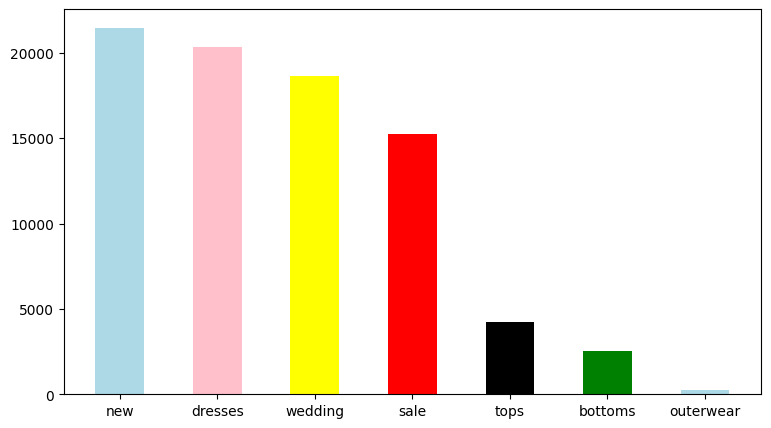

In [45]:
color = ['lightblue', 'pink', 'yellow', 'red', 'black', 'green']
plt.figure(figsize = (9,5))
plt.bar(modcloth_data['category'].unique(),modcloth_data['category'].value_counts() , width = 0.5, color=color)

plt.show()

In [46]:
g_by_category = modcloth_data.groupby('category')
(g_by_category['fit'].value_counts()).unstack()

/tmp/ipykernel_18/3340736914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_by_category = modcloth_data.groupby('category')


fit,fit,large,small
category,,,
bottoms,10648,2055,2541
dresses,13567,2556,2506
new,14413,2977,4086
outerwear,2791,816,613
sale,1582,428,496
tops,13493,4161,2693
wedding,219,43,13


In [47]:
g_by_category['fit'].value_counts()

category   fit  
bottoms    fit      10648
           small     2541
           large     2055
dresses    fit      13567
           large     2556
           small     2506
new        fit      14413
           small     4086
           large     2977
outerwear  fit       2791
           large      816
           small      613
sale       fit       1582
           small      496
           large      428
tops       fit      13493
           large     4161
           small     2693
wedding    fit        219
           large       43
           small       13
Name: count, dtype: int64